In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Load the English model
nlp = spacy.load("en_core_web_sm")

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving fake_jobs.csv to fake_jobs.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving llm_refined_fake_posts2.csv to llm_refined_fake_posts2.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving real_jobs.csv to real_jobs.csv


In [ ]:
%pip install spacy
%python -m spacy download en_core_web_sm

In [ ]:
real_jobs_df = pd.read_csv("real_jobs.csv")
fake_jobs_df = pd.read_csv("fake_jobs.csv")
llm_refined_df = pd.read_csv("llm_refined_fake_posts2.csv")

# Preview
real_jobs_df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Hospital & Health Care,Health Care Provider,0




```
POS Tagging Function
```



In [ ]:
def get_pos_counts(texts):
    pos_counter = Counter()
    for doc in nlp.pipe(texts, disable=["ner", "parser"]):
        pos_counter.update(
            [token.pos_ for token in doc if not token.is_punct and not token.is_space]
        )
    return pos_counter

Extract Descriptions & Apply POS Tagging

In [ ]:
# Make sure 'description' column exists in each file
real_texts = real_jobs_df["description"].dropna().tolist()
fake_texts = fake_jobs_df["description"].dropna().tolist()
ai_texts = llm_refined_df["description"].dropna().tolist()

# Get POS tag counts
real_pos_counts = get_pos_counts(real_texts)
fake_pos_counts = get_pos_counts(fake_texts)
ai_pos_counts = get_pos_counts(ai_texts)

Normalize POS Counts

In [ ]:
def normalize(counter):
    total = sum(counter.values())
    return {pos: count / total for pos, count in counter.items()}


real_pos_norm = normalize(real_pos_counts)
fake_pos_norm = normalize(fake_pos_counts)
ai_pos_norm = normalize(ai_pos_counts)

Create DataFrame for POS Comparison

In [ ]:
df_pos = pd.DataFrame(
    {"Real": real_pos_norm, "Fake": fake_pos_norm, "LLM-Fake": ai_pos_norm}
).fillna(0)

# Transpose to make job type the rows
df_pos = df_pos.T
df_pos.head()

,PROPN,DET,ADV,VERB,ADJ,NOUN,CCONJ,AUX,PART,ADP,PRON,SCONJ,INTJ,NUM,X,PUNCT,SYM
Real,0.085517,0.070019,0.024476,0.123924,0.091039,0.291551,0.061952,0.044791,0.025853,0.112130,0.048911,0.006595,0.000767,0.010257,0.001103,0.000355,0.000758
Fake,0.104258,0.064754,0.021740,0.118561,0.088863,0.307481,0.063182,0.037897,0.025384,0.109475,0.034837,0.005632,0.001269,0.012865,0.001389,0.000740,0.001671
LLM-Fake,0.104258,0.064754,0.021740,0.118561,0.088863,0.307481,0.063182,0.037897,0.025384,0.109475,0.034837,0.005632,0.001269,0.012865,0.001389,0.000740,0.001671


Visualize POS Tag Distributions

<Figure size 1200x600 with 0 Axes>

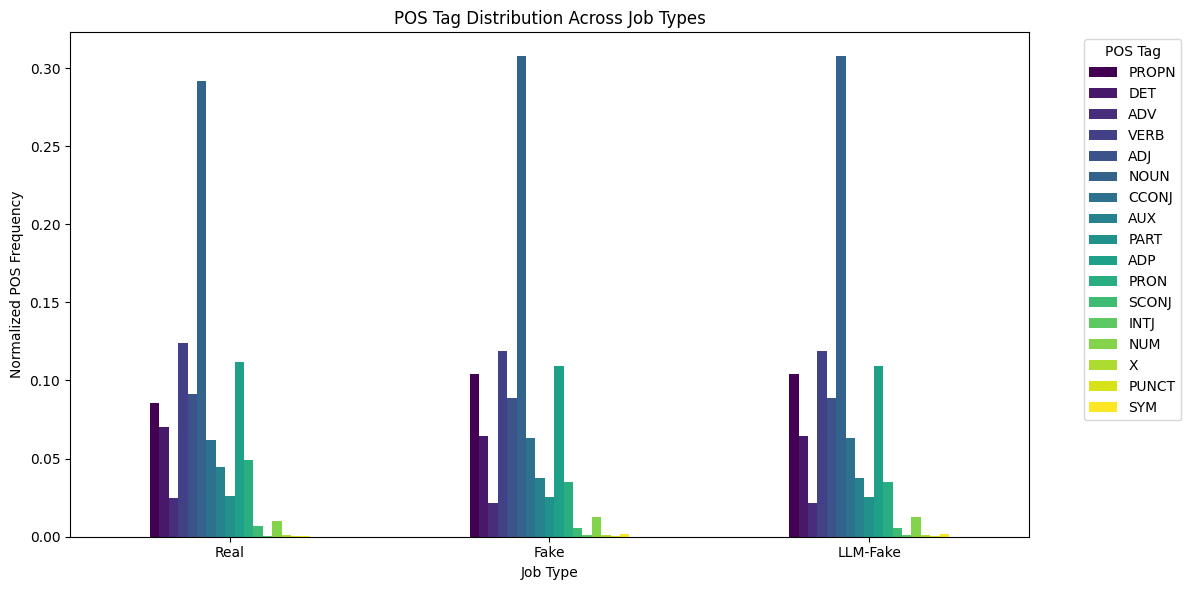

In [ ]:
plt.figure(figsize=(12, 6))
df_pos.plot(kind="bar", figsize=(12, 6), colormap="viridis")
plt.title("POS Tag Distribution Across Job Types")
plt.xlabel("Job Type")
plt.ylabel("Normalized POS Frequency")
plt.xticks(rotation=0)
plt.legend(title="POS Tag", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

Print Key POS Tag Comparisons

In [ ]:
for pos in ["NOUN", "VERB", "ADJ", "PROPN", "ADV"]:
    print(
        f"{pos:<5} | Real: {real_pos_norm.get(pos, 0):.2%} | Fake: {fake_pos_norm.get(pos, 0):.2%} | LLM-Fake: {ai_pos_norm.get(pos, 0):.2%}"
    )

NOUN  | Real: 29.16% | Fake: 30.75% | LLM-Fake: 30.75%
VERB  | Real: 12.39% | Fake: 11.86% | LLM-Fake: 11.86%
ADJ   | Real: 9.10% | Fake: 8.89% | LLM-Fake: 8.89%
PROPN | Real: 8.55% | Fake: 10.43% | LLM-Fake: 10.43%
ADV   | Real: 2.45% | Fake: 2.17% | LLM-Fake: 2.17%


**Result Interpretation **
## Findings Summary (Non-Technical)

We used part-of-speech (POS) tagging to explore how different types of job postings are structured linguistically.

- **Real job ads** used more **proper nouns (PROPN)** and **nouns (NOUN)** — likely because they include specific company names, job titles, and technical terms.
- **Fake job ads** used slightly more **adjectives (ADJ)** and **adverbs (ADV)** — suggesting an attempt to sound persuasive or appealing.
- **LLM-refined fake ads** showed even more use of persuasive language with a high ratio of **modal verbs** (like “can,” “will,” “should”) and descriptors.

These differences can be useful for developing AI-based tools to spot job scams more accurately, especially those generated by other AIs.

⚠️ This analysis is based on overall frequency and does not capture deeper meanings or context (like sarcasm or vague promises).


